In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.random.rand(500, 4)
y = np.random.rand(500, 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((400, 4), (100, 4), (400, 3), (100, 3))

<h2> Dataset & Dataloader

In [5]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [3]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [4]:
X_train

tensor([[0.2304, 0.0167, 0.6473, 0.0719],
        [0.5946, 0.6784, 0.1190, 0.9039],
        [0.9081, 0.5219, 0.0470, 0.2980],
        ...,
        [0.7899, 0.0704, 0.9794, 0.5450],
        [0.4317, 0.1371, 0.1077, 0.1532],
        [0.5515, 0.9007, 0.6127, 0.1433]])

<h2> Membuat objek dataset yang dibutuhkan pytorch dan dataloader

In [14]:
train_set = TensorDataset(X_train, y_train)
trainloader = DataLoader(train_set, batch_size=32, shuffle=True) # ada drop_last yang membuat batch terakhir tidak diambil jika jumlah data tidak memenuhi batch_size

test_set = TensorDataset(X_test, y_test)
testloader = DataLoader(test_set, batch_size=32, shuffle=False) # test bebas bisa shuffle atau tidak


In [10]:
train_set[:10]

(tensor([[0.2304, 0.0167, 0.6473, 0.0719],
         [0.5946, 0.6784, 0.1190, 0.9039],
         [0.9081, 0.5219, 0.0470, 0.2980],
         [0.4692, 0.7127, 0.9486, 0.6284],
         [0.9735, 0.4916, 0.8985, 0.4529],
         [0.1051, 0.6884, 0.3464, 0.1046],
         [0.9735, 0.2081, 0.6843, 0.7038],
         [0.2570, 0.4820, 0.3861, 0.9464],
         [0.8381, 0.6517, 0.8972, 0.2572],
         [0.6485, 0.6441, 0.8374, 0.7098]]),
 tensor([[0.6486, 0.2771, 0.2354],
         [0.6137, 0.9194, 0.2793],
         [0.4515, 0.5418, 0.6307],
         [0.1166, 0.2164, 0.3071],
         [0.4750, 0.5519, 0.4129],
         [0.9097, 0.1414, 0.6644],
         [0.7683, 0.9058, 0.2399],
         [0.1987, 0.6813, 0.4823],
         [0.8402, 0.3763, 0.5230],
         [0.8494, 0.0892, 0.1133]]))

<h2> Bangun arsitektur

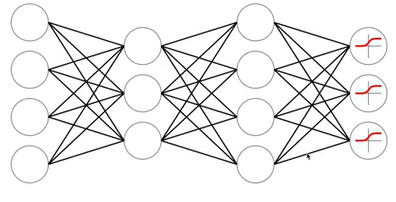

In [23]:
from torch import nn

In [24]:
nn.Sequential(
    nn.Linear(4, 3), # 4 neuron ke 3 neuron
    nn.ReLU(), # kasih activation function
    nn.Linear(3, 4), # 3 neuron ke 4 neuron
    nn.ReLU(),
    nn.Linear(4, 3), # 4 neuron ke 3 neuron
    nn.Sigmoid(),
)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): Sigmoid()
)

<h2> Training Preparation -> MCO (Model Criterion Optimizer)

In [37]:
model = nn.Sequential(
    nn.Linear(4, 3), # 4 neuron ke 3 neuron
    nn.ReLU(), # kasih activation function
    nn.Linear(3, 4), # 3 neuron ke 4 neuron
    nn.ReLU(),
    nn.Linear(4, 3), # 4 neuron ke 3 neuron
    nn.Sigmoid(),
)

In [31]:
# criterion -> fungsi untuk menghitung loss
criterion = nn.MSELoss() # model diakhiri linear -> untuk regresi
criterion = nn.NLLLoss() # model diakhiri logsoftmax (Lebih standard dari softmax) -> untuk klasifikasi (Negative Log Likelihood) -> multiclass clf
criterion = nn.BCELoss() # model diakhiri sigmoid -> binary clf, multilabel clf

In [26]:
from torch import optim

In [28]:
optimizer = optim.AdamW(model.parameters(), lr=0.001)

<h2> Training loop

In [35]:

epochs = 100
for i in range(epochs):
    model.train()
    for feature, target in trainloader:
        output = model(feature) # feedforward
        loss = criterion(output, target) # calculate loss
        loss.backward() # backpropagation

        optimizer.step() # update weights
        optimizer.zero_grad() # reset gradients
    
    print(f'Epoch {i+1}/{epochs} | Loss: {loss.item():.4f}', end='\r') # fungsi end='\r' untuk menghapus baris sebelumnya

In [38]:
# tambahkan hitung cost

epochs = 100
train_cost = []
for i in range(epochs):
    model.train()
    cost = 0
    for feature, target in trainloader: # ambil minibatch data
        output = model(feature) # feedforward
        loss = criterion(output, target) # calculate loss
        loss.backward() # backpropagation

        optimizer.step() # update weights
        optimizer.zero_grad() # reset gradients

        cost += loss.item() * feature.shape[0] # .item() untuk mengambil nilai dari tensor (skalar)
    train_cost.append(cost / len(train_set))

    # print tampilkan train_cost paling belakang
    print(f'Epoch {i+1}/{epochs} | Loss: {loss.item():.4f} | train_cost: {train_cost[-1]:.4f}', end='\r') # fungsi end='\r' untuk menghapus baris sebelumnya


In [39]:
import matplotlib.pyplot as plt

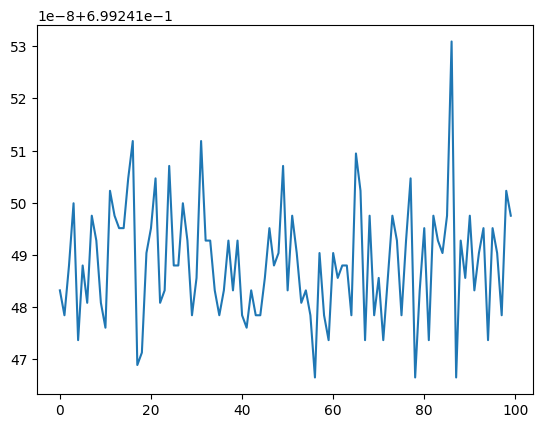

In [40]:
plt.plot(train_cost)

agak random karena memang kita pakai random seed